## **Evaluating multiple models ( Heart Disease Classification )**

**Get the data ready**

As an example dataset, we'll import heart-disease.csv. This file contains anonymised patient medical records and whether or not they have heart disease or not.

In [1]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('drive/My Drive/Colab Notebooks/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here, each row is a different patient and all columns except target are different patient characteristics. target indicates whether the patient has heart disease (target = 1) or not (target = 0).

**Exploring the data**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


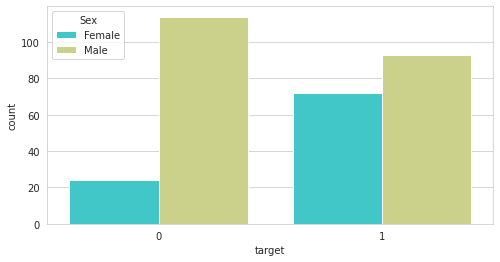

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))
sns.countplot(x='target',hue='sex',data=heart_disease,palette='rainbow')
plt.legend(title='Sex', loc='upper left', labels=['Female', 'Male'])

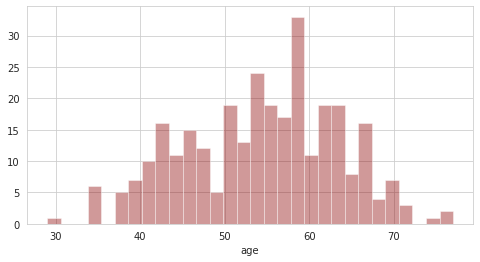

In [3]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.distplot(heart_disease['age'],kde=False,color='darkred',bins=30)

In [4]:
# Shuffel the dataset
heart_disease = heart_disease.sample(frac=1)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1


In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)
# Create y (the target column)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=0)

# View the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

**Standardization**

In [6]:
# Scale values to numbers between 0 and 1 ( shape remains the same)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_scaled.shape


(242, 13)

**Choose the model and hyperparameters**

This is often referred to as model or clf (short for classifier) or estimator (as in the Scikit-Learn) documentation.

Hyperparameters are like knobs on an oven you can tune to cook your favourite dish.

In [7]:
# Here we are using 7 different estimators with Grid search to find the best model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm  
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = [
    { "estimater": KNeighborsClassifier(),
      "params": {
          "n_neighbors": [25,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35],
          "p": [1,2,3],
        }
    },
    { "estimater": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "estimater": MultinomialNB(),
      "params": {
          "fit_prior": [True, False]    
      }
    },
    { "estimater": LinearSVC(),
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [900, 1000, 1100]
      }
    },
    { "estimater": svm.SVC(),
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
      }
    },
    { "estimater": RandomForestClassifier(),
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [85,90,95,100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "estimater": SGDClassifier(),
      "params": {
          "loss": ['hinge','log','perceptron'], 
          "penalty": ['l2', 'l1'], 
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]

column_names = ["KNeighbors", "DecisionTree", "MultiNB", "SVC", "SVM", "RFC", "SGDClassifier"]
entries = []

highest_acc = 0
best_model = None

for model in models:
  print(model["estimater"])

  # Create model
  clf = model["estimater"]
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], 
                            cv = 5)
  
  # Fit the model
  grid_search.fit(X_train_scaled, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = grid_search.predict(X_test_scaled)
  acc = accuracy_score(predicted, y_test)
  entries.append(acc)

  print(grid_search.best_params_)

  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = grid_search

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
{'leaf_size': 25, 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'best'}
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'fit_prior': False}
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000

       Estimater  Accuracy
0     KNeighbors  0.819672
1   DecisionTree  0.754098
2        MultiNB  0.754098
3            SVC  0.836066
4            SVM  0.819672
5            RFC  0.868852
6  SGDClassifier  0.868852


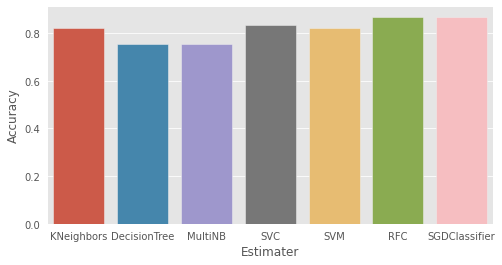

In [8]:
# Plotting each models performance

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.DataFrame({"Estimater": column_names, 
                   "Accuracy": entries
                  })

plt.figure(figsize=(8, 4))
sns.barplot(x='Estimater', y='Accuracy', data=df)
print(df)

**Evaluate the model**

Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels. In other words, it returns how accurate your model is.

In [0]:
# This is a function the takes the true labels and the predicted labels as input and returns metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    return metric_dict

In [10]:
# Make the predictions on the test data using the best performing model
predicted = best_model.predict(X_test_scaled)
evaluate_preds(y_test, predicted)

{'accuracy': 0.87, 'f1': 0.87, 'precision': 0.87, 'recall': 0.87}